In [1]:
import scvelo as scv
import scanpy as sc
import cellrank as cr
import numpy as np
from loompy import combine

scv.settings.verbosity = 3
scv.settings.set_figure_params('scvelo')
cr.settings.verbosity = 2

ModuleNotFoundError: No module named 'cellrank'

In [ ]:
import warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)

In [3]:
adata = scv.read("/home/julien/Téléchargements/PEZ_for_scvelo.h5ad", cache=True)

In [4]:
adata

AnnData object with n_obs × n_vars = 3624 × 20090
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.6', 'seurat_clusters', 'SCT_snn_res.0.7', 'SCT_snn_res.0.8', 'SCT_snn_res.0.9', 'SCT_snn_res.0.5', 'SCT_snn_res.0.4', 'clusters'
    var: 'sct.detection_rate', 'sct.gmean', 'sct.variance', 'sct.residual_mean', 'sct.residual_variance', 'sct.variable'
    obsm: 'X_pca', 'X_umap'

In [5]:
adata.obs_names

Index(['AAACCCACAATAACGA', 'AAACCCACAATCAAGA', 'AAACCCACATCACAGT',
       'AAACGAAAGTCTTCGA', 'AAACGAACAGTCGGTC', 'AAACGAAGTCCTGTCT',
       'AAACGAAGTGGCTCTG', 'AAACGAATCTGTGCTC', 'AAACGCTAGAAGGGAT',
       'AAAGAACGTCGCACAC',
       ...
       'TTTGATCAGAGTATAC', 'TTTGATCCAATAGTCC', 'TTTGATCCACAGCATT',
       'TTTGATCCACATGAAA', 'TTTGGAGTCATTTGGG', 'TTTGGTTAGGGCATGT',
       'TTTGGTTCAGAGGCTA', 'TTTGGTTTCATTGTGG', 'TTTGGTTTCGTCCTTG',
       'TTTGTTGGTAGTATAG'],
      dtype='object', length=3624)

In [6]:
print(adata.X)

  (18, 0)	0.6931472
  (208, 0)	0.6931472
  (340, 0)	0.6931472
  (1016, 0)	0.6931472
  (1215, 0)	1.0986123
  (1685, 0)	1.0986123
  (1690, 0)	0.6931472
  (1883, 0)	0.6931472
  (2397, 0)	0.6931472
  (2400, 0)	0.6931472
  (2657, 0)	0.6931472
  (2664, 0)	0.6931472
  (2800, 0)	0.6931472
  (2924, 0)	0.6931472
  (2962, 0)	0.6931472
  (2991, 0)	0.6931472
  (3182, 0)	0.6931472
  (3368, 0)	0.6931472
  (3469, 0)	0.6931472
  (3561, 0)	0.6931472
  (5, 1)	0.6931472
  (29, 1)	1.0986123
  (99, 1)	0.6931472
  (200, 1)	0.6931472
  (241, 1)	1.0986123
  :	:
  (3165, 20088)	0.6931472
  (3169, 20088)	0.6931472
  (3306, 20088)	0.6931472
  (3346, 20088)	0.6931472
  (3476, 20088)	0.6931472
  (3558, 20088)	0.6931472
  (3608, 20088)	0.6931472
  (18, 20089)	0.6931472
  (285, 20089)	0.6931472
  (993, 20089)	0.6931472
  (1112, 20089)	0.6931472
  (1240, 20089)	0.6931472
  (1272, 20089)	0.6931472
  (1461, 20089)	0.6931472
  (1731, 20089)	0.6931472
  (2262, 20089)	0.6931472
  (2281, 20089)	0.6931472
  (2395, 20089)	0.6

In [7]:
filename = ("../Velocyto/PEZ.loom")

In [8]:
ldata = scv.read(filename, cache=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical


In [9]:
ldata

AnnData object with n_obs × n_vars = 4326 × 33538
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [10]:
ldata.obs_names

Index(['PEZ:AAACCCACATCACAGTx', 'PEZ:AACCTTTTCACCCTCAx',
       'PEZ:AACCAACGTCGTGGAAx', 'PEZ:AAAGGTAGTCATCAGTx',
       'PEZ:AACCAACTCACTCCGTx', 'PEZ:AACAACCTCTGGCTGGx',
       'PEZ:AACACACCATACATCGx', 'PEZ:AAAGAACTCACATTGGx',
       'PEZ:AACCAACGTTGTGTTGx', 'PEZ:AACGGGATCGCCGAACx',
       ...
       'PEZ:TTTGGAGTCATTTGGGx', 'PEZ:TTTGGTTCAGAGGCTAx',
       'PEZ:TTTGTTGGTAGTATAGx', 'PEZ:TTTGACTGTAGCTGCCx',
       'PEZ:TTTCGATGTAGCACAGx', 'PEZ:TTTGGTTTCATTGTGGx',
       'PEZ:TTTCGATGTTTCGTGAx', 'PEZ:TTTGACTGTACTCGTAx',
       'PEZ:TTTCGATTCCCAGTGGx', 'PEZ:TTTGATCAGAGTATACx'],
      dtype='object', name='CellID', length=4326)

In [11]:
adata = scv.utils.merge(adata, ldata)

In [12]:
adata

AnnData object with n_obs × n_vars = 3624 × 18475
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.6', 'seurat_clusters', 'SCT_snn_res.0.7', 'SCT_snn_res.0.8', 'SCT_snn_res.0.9', 'SCT_snn_res.0.5', 'SCT_snn_res.0.4', 'clusters', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'sct.detection_rate', 'sct.gmean', 'sct.variance', 'sct.residual_mean', 'sct.residual_variance', 'sct.variable', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_pca', 'X_umap'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [13]:
print(adata.X)

  (18, 0)	0.6931472
  (208, 0)	0.6931472
  (340, 0)	0.6931472
  (1016, 0)	0.6931472
  (1215, 0)	1.0986123
  (1685, 0)	1.0986123
  (1690, 0)	0.6931472
  (1883, 0)	0.6931472
  (2397, 0)	0.6931472
  (2400, 0)	0.6931472
  (2657, 0)	0.6931472
  (2664, 0)	0.6931472
  (2800, 0)	0.6931472
  (2924, 0)	0.6931472
  (2962, 0)	0.6931472
  (2991, 0)	0.6931472
  (3182, 0)	0.6931472
  (3368, 0)	0.6931472
  (3469, 0)	0.6931472
  (3561, 0)	0.6931472
  (50, 1)	0.6931472
  (72, 1)	0.6931472
  (247, 1)	0.6931472
  (638, 1)	0.6931472
  (926, 1)	0.6931472
  :	:
  (3165, 18473)	0.6931472
  (3169, 18473)	0.6931472
  (3306, 18473)	0.6931472
  (3346, 18473)	0.6931472
  (3476, 18473)	0.6931472
  (3558, 18473)	0.6931472
  (3608, 18473)	0.6931472
  (18, 18474)	0.6931472
  (285, 18474)	0.6931472
  (993, 18474)	0.6931472
  (1112, 18474)	0.6931472
  (1240, 18474)	0.6931472
  (1272, 18474)	0.6931472
  (1461, 18474)	0.6931472
  (1731, 18474)	0.6931472
  (2262, 18474)	0.6931472
  (2281, 18474)	0.6931472
  (2395, 18474)	0

In [14]:
scv.pl.proportions(adata)

In [15]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)

Filtered out 10082 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Extracted 2000 highly variable genes.


In [16]:
adata

AnnData object with n_obs × n_vars = 3624 × 2000
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.6', 'seurat_clusters', 'SCT_snn_res.0.7', 'SCT_snn_res.0.8', 'SCT_snn_res.0.9', 'SCT_snn_res.0.5', 'SCT_snn_res.0.4', 'clusters', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'sct.detection_rate', 'sct.gmean', 'sct.variance', 'sct.residual_mean', 'sct.residual_variance', 'sct.variable', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    obsm: 'X_pca', 'X_umap'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [17]:
print(adata.X)

  (6, 0)	1.9459101
  (14, 0)	0.6931472
  (17, 0)	0.6931472
  (20, 0)	0.6931472
  (24, 0)	1.0986123
  (26, 0)	1.0986123
  (33, 0)	0.6931472
  (36, 0)	0.6931472
  (51, 0)	0.6931472
  (70, 0)	0.6931472
  (75, 0)	0.6931472
  (86, 0)	0.6931472
  (94, 0)	0.6931472
  (96, 0)	0.6931472
  (105, 0)	0.6931472
  (106, 0)	1.0986123
  (113, 0)	0.6931472
  (116, 0)	1.0986123
  (121, 0)	0.6931472
  (129, 0)	0.6931472
  (130, 0)	0.6931472
  (132, 0)	0.6931472
  (139, 0)	0.6931472
  (142, 0)	0.6931472
  (146, 0)	1.3862944
  :	:
  (165, 1999)	0.6931472
  (191, 1999)	0.6931472
  (318, 1999)	1.0986123
  (324, 1999)	0.6931472
  (344, 1999)	0.6931472
  (649, 1999)	1.0986123
  (843, 1999)	0.6931472
  (936, 1999)	0.6931472
  (951, 1999)	0.6931472
  (1329, 1999)	0.6931472
  (1509, 1999)	0.6931472
  (1554, 1999)	0.6931472
  (1646, 1999)	0.6931472
  (1876, 1999)	1.3862944
  (2015, 1999)	0.6931472
  (2018, 1999)	0.6931472
  (2119, 1999)	0.6931472
  (2413, 1999)	0.6931472
  (2819, 1999)	0.6931472
  (2964, 1999)	1.0

In [18]:
sc.tl.pca(adata)

In [19]:
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)

In [20]:
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [21]:
scv.tl.recover_dynamics(adata, n_jobs=8)

recovering dynamics (using 8/40 cores)


  0%|          | 0/385 [00:00<?, ?gene/s]

    finished (0:00:24) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [22]:
scv.tl.velocity(adata, mode='dynamical')

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [23]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [24]:
scv.pl.velocity_embedding_stream(adata, basis='umap', legend_fontsize=12, title='', smooth=.8, min_mass=4)

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


In [25]:
cr.tl.terminal_states(adata, cluster_key='clusters', weight_connectivities=0.2)

Computing transition matrix based on logits using `'deterministic'` mode
Estimating `softmax_scale` using `'deterministic'` mode


  0%|          | 0/3624 [00:00<?, ?cell/s]

Setting `softmax_scale=3.5609`


  0%|          | 0/3624 [00:00<?, ?cell/s]

    Finish (0:00:05)
Using a connectivity kernel with weight `0.2`
Computing transition matrix based on `adata.obsp['connectivities']`
    Finish (0:00:00)
Computing eigendecomposition of the transition matrix
Adding `adata.uns['eig_fwd']`
       `.eigendecomposition`
    Finish (0:00:00)
Adding `.macrostates_memberships`
        `.macrostates`
    Finish (0:00:00)
Adding `adata.obs['terminal_states_probs']`
       `adata.obs['terminal_states']`
       `adata.obsm['macrostates_fwd']`
       `.terminal_states_probabilities`
       `.terminal_states`
    Finish


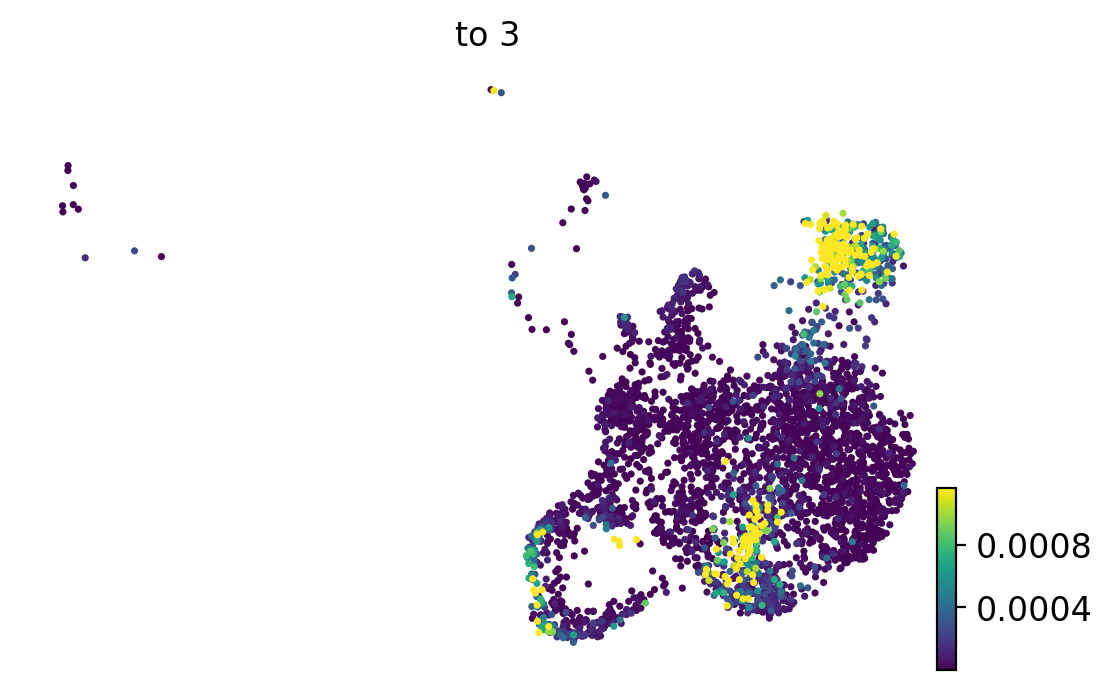

In [26]:
cr.pl.terminal_states(adata)

In [27]:
cr.tl.initial_states(adata, cluster_key='clusters')

Computing transition matrix based on logits using `'deterministic'` mode
Estimating `softmax_scale` using `'deterministic'` mode


  0%|          | 0/3624 [00:00<?, ?cell/s]

Setting `softmax_scale=3.5609`


  0%|          | 0/3624 [00:00<?, ?cell/s]

    Finish (0:00:04)
Using a connectivity kernel with weight `0.2`
Computing transition matrix based on `adata.obsp['connectivities']`
    Finish (0:00:00)
Computing eigendecomposition of the transition matrix
Adding `adata.uns['eig_bwd']`
       `.eigendecomposition`
    Finish (0:00:00)
Computing Schur decomposition
Adding `adata.uns['eig_bwd']`
       `.eigendecomposition`
       `.schur`
       `.schur_matrix`
    Finish (0:00:00)
Computing `2` macrostates
Adding `.macrostates_memberships`
       `.macrostates`
       `.schur`
       `.coarse_T`
       `.coarse_stationary_distribution`
    Finish (0:00:00)
Adding `adata.obs['initial_states_probs']`
       `adata.obs['initial_states']`
       `adata.obsm['macrostates_bwd']`
       `.terminal_states_probabilities`
       `.terminal_states`
    Finish


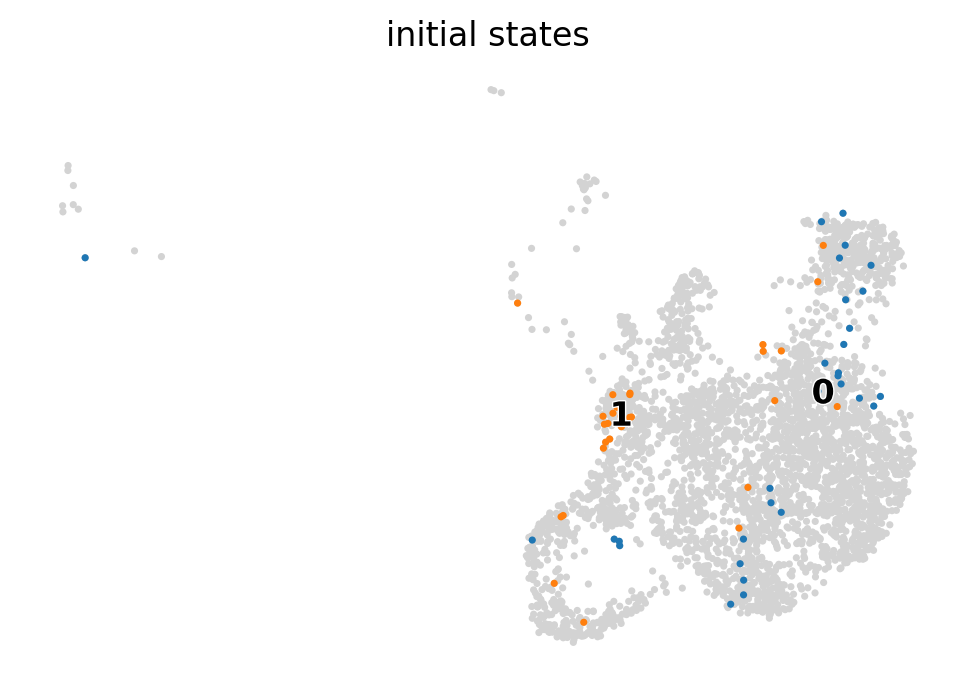

In [28]:
cr.pl.initial_states(adata, discrete=True)

In [29]:
cr.tl.lineages(adata)

Computing lineage probabilities towards terminal states
Computing absorption probabilities


  0%|          | 0/30 [00:00<?, ?/s]

Adding `adata.obsm['to_terminal_states']`
       `.absorption_probabilities`
    Finish (0:00:00)
Adding lineages to `adata.obsm['to_terminal_states']`
    Finish (0:00:00)


In [30]:
cr.pl.lineages(adata, same_plot=False)

In [31]:
cr.pl.lineages(adata, same_plot=True)

In [32]:
scv.tl.recover_latent_time(adata, root_key='initial_states_probs', end_key='terminal_states_probs')

computing latent time using initial_states_probs, terminal_states_probs as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)


In [33]:
scv.tl.paga(adata, groups='clusters', root_key='initial_states_probs', end_key='terminal_states_probs',
            use_time_prior='velocity_pseudotime')

running PAGA using priors: ['velocity_pseudotime', 'initial_states_probs', 'terminal_states_probs']
    finished (0:00:02) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


In [34]:
cr.pl.cluster_fates(adata, mode="paga_pie", cluster_key="clusters", basis='umap',
                    legend_kwargs={'loc': 'top right out'}, legend_loc='top left out',
                    node_size_scale=5, edge_width_scale=1, max_edge_width=4, title='directed PAGA')

In [35]:
drivers = cr.tl.lineage_drivers(adata)

Computing correlations for lineages `['3']` restricted to clusters `None` in layer `X` with `use_raw=False`
Adding `.lineage_drivers`
       `adata.var['to 3 corr']`
    Finish (0:00:00)


In [36]:
drivers

3 corr        3 pval        3 qval  3 ci low  3 ci high
MALAT1    0.200189  2.706816e-34  1.804544e-31  0.168730   0.231242
DDX17     0.197755  1.745051e-33  8.725253e-31  0.166266   0.228841
UVSSA     0.187087  4.580354e-30  1.832142e-27  0.155474   0.218316
PCNX1     0.183570  5.530946e-29  1.382737e-26  0.151919   0.214846
GAS6-AS1  0.172401  1.080381e-25  2.400847e-23  0.140631   0.203817
...            ...           ...           ...       ...        ...
GJB2     -0.156355  2.390684e-21  3.984474e-19 -0.187958  -0.124429
RBP1     -0.183866  4.493406e-29  1.283830e-26 -0.215138  -0.152218
RPL29    -0.185924  1.049471e-29  3.498236e-27 -0.217169  -0.154299
TMSB10   -0.274146  2.721104e-64  2.721104e-61 -0.303992  -0.243762
ACTG1    -0.305836  1.358778e-80  2.717556e-77 -0.335059  -0.276025

[2000 rows x 5 columns]

In [37]:
drivers.to_csv('PEZ_drivers.csv', sep=',')

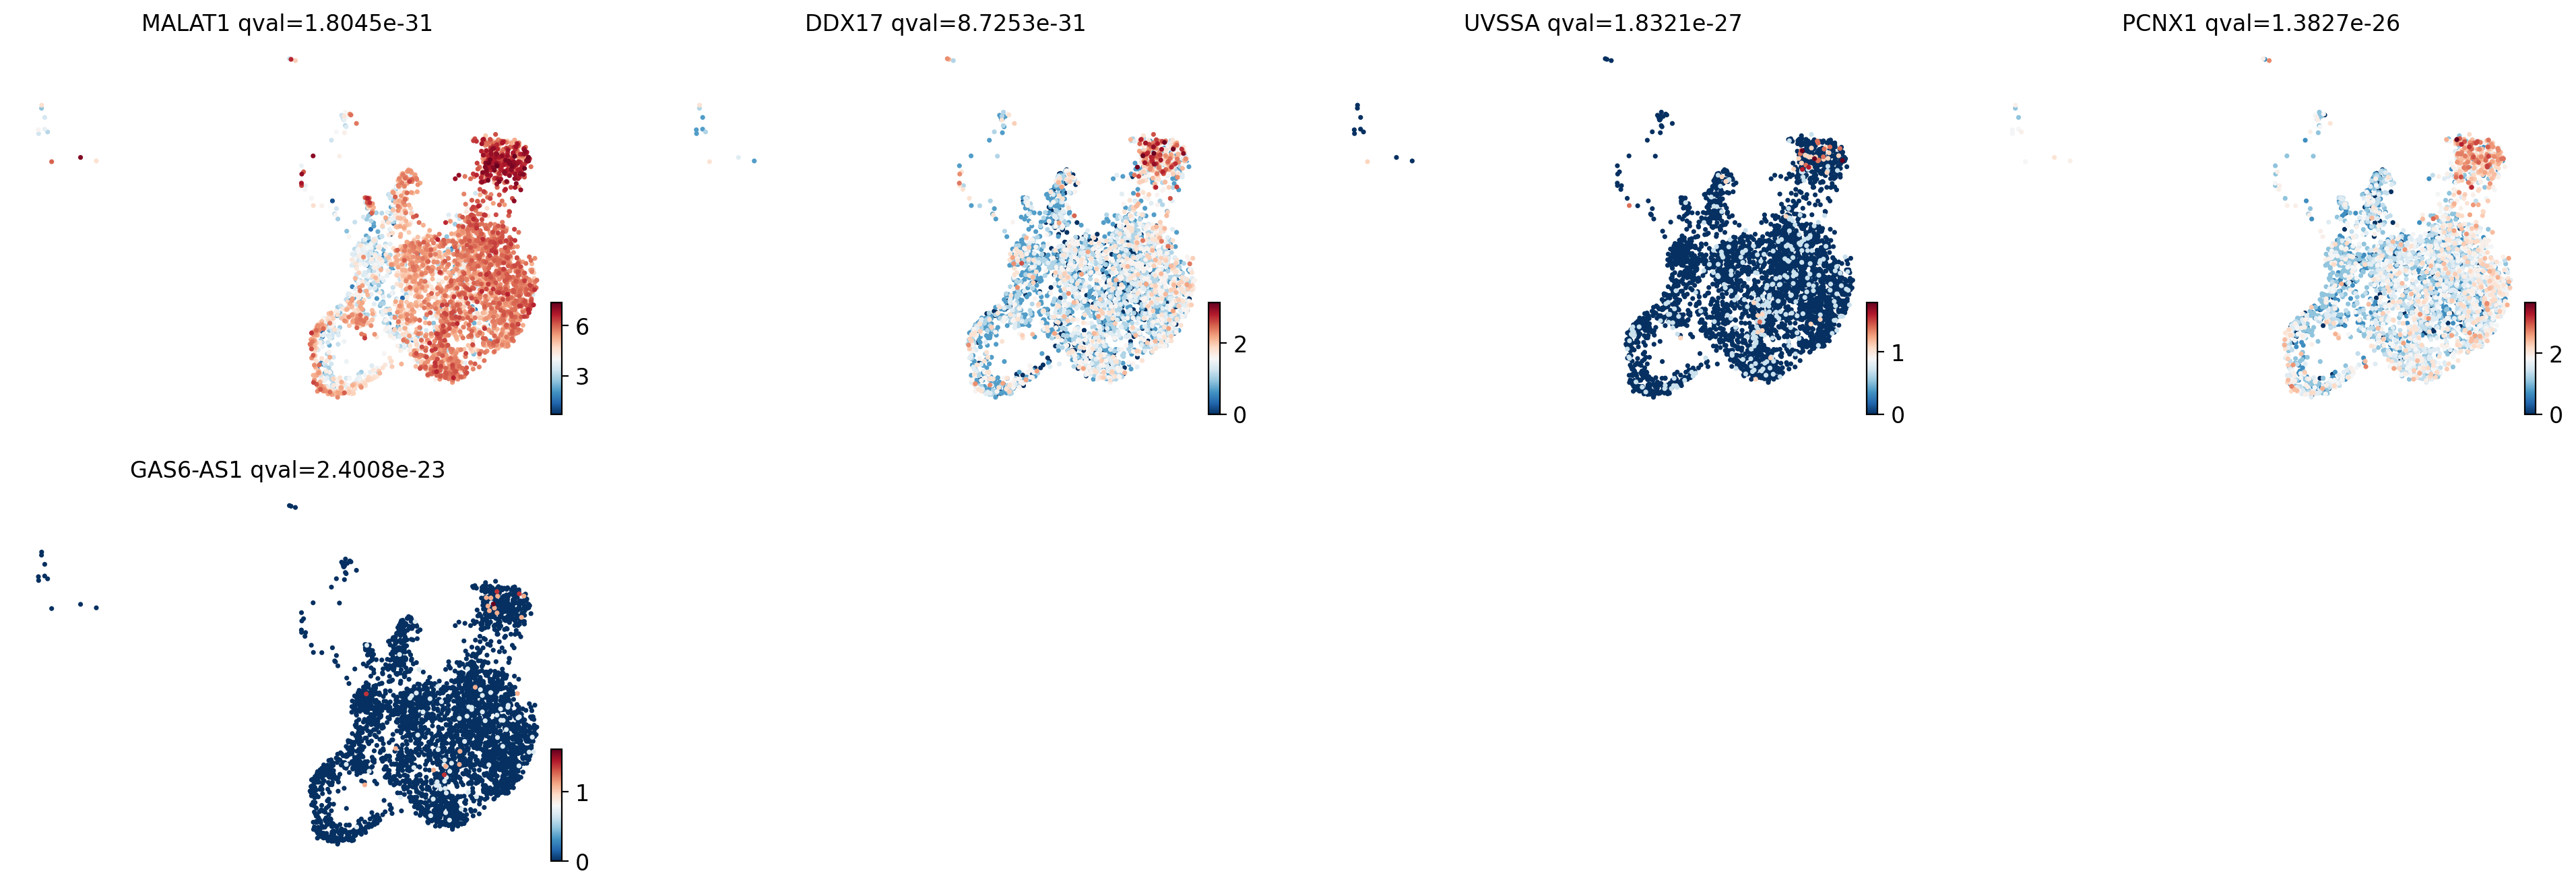

In [38]:
cr.pl.lineage_drivers(adata, lineage="3", n_genes=5)

In [39]:
root_idx = np.where(adata.obs['initial_states'] == '0')[0][0]
adata.uns['iroot'] = root_idx
sc.tl.dpt(adata)

In [40]:
scv.pl.scatter(adata, color=['clusters', root_idx, 'latent_time', 'dpt_pseudotime'], fontsize=16,
               cmap='viridis', perc=[2, 98], colorbar=True, rescale_color=[0, 1],
               title=['clusters', 'root cell', 'latent time', 'dpt pseudotime'])

In [41]:
model = cr.ul.models.GAM(adata)

In [44]:
cr.pl.gene_trends(adata, model=model, data_key='X',
                  genes=['CCL25','DES', 'TNNT3'], ncols=3,
                  time_key='latent_time', same_plot=True, hide_cells=True,
                  figsize=(15, 4), n_test_points=200)

Computing trends using `1` core(s)


  0%|          | 0/3 [00:00<?, ?gene/s]

    Finish (0:00:00)
Plotting trends


Computing trends using `1` core(s)


  0%|          | 0/100 [00:00<?, ?gene/s]

    Finish (0:00:10)


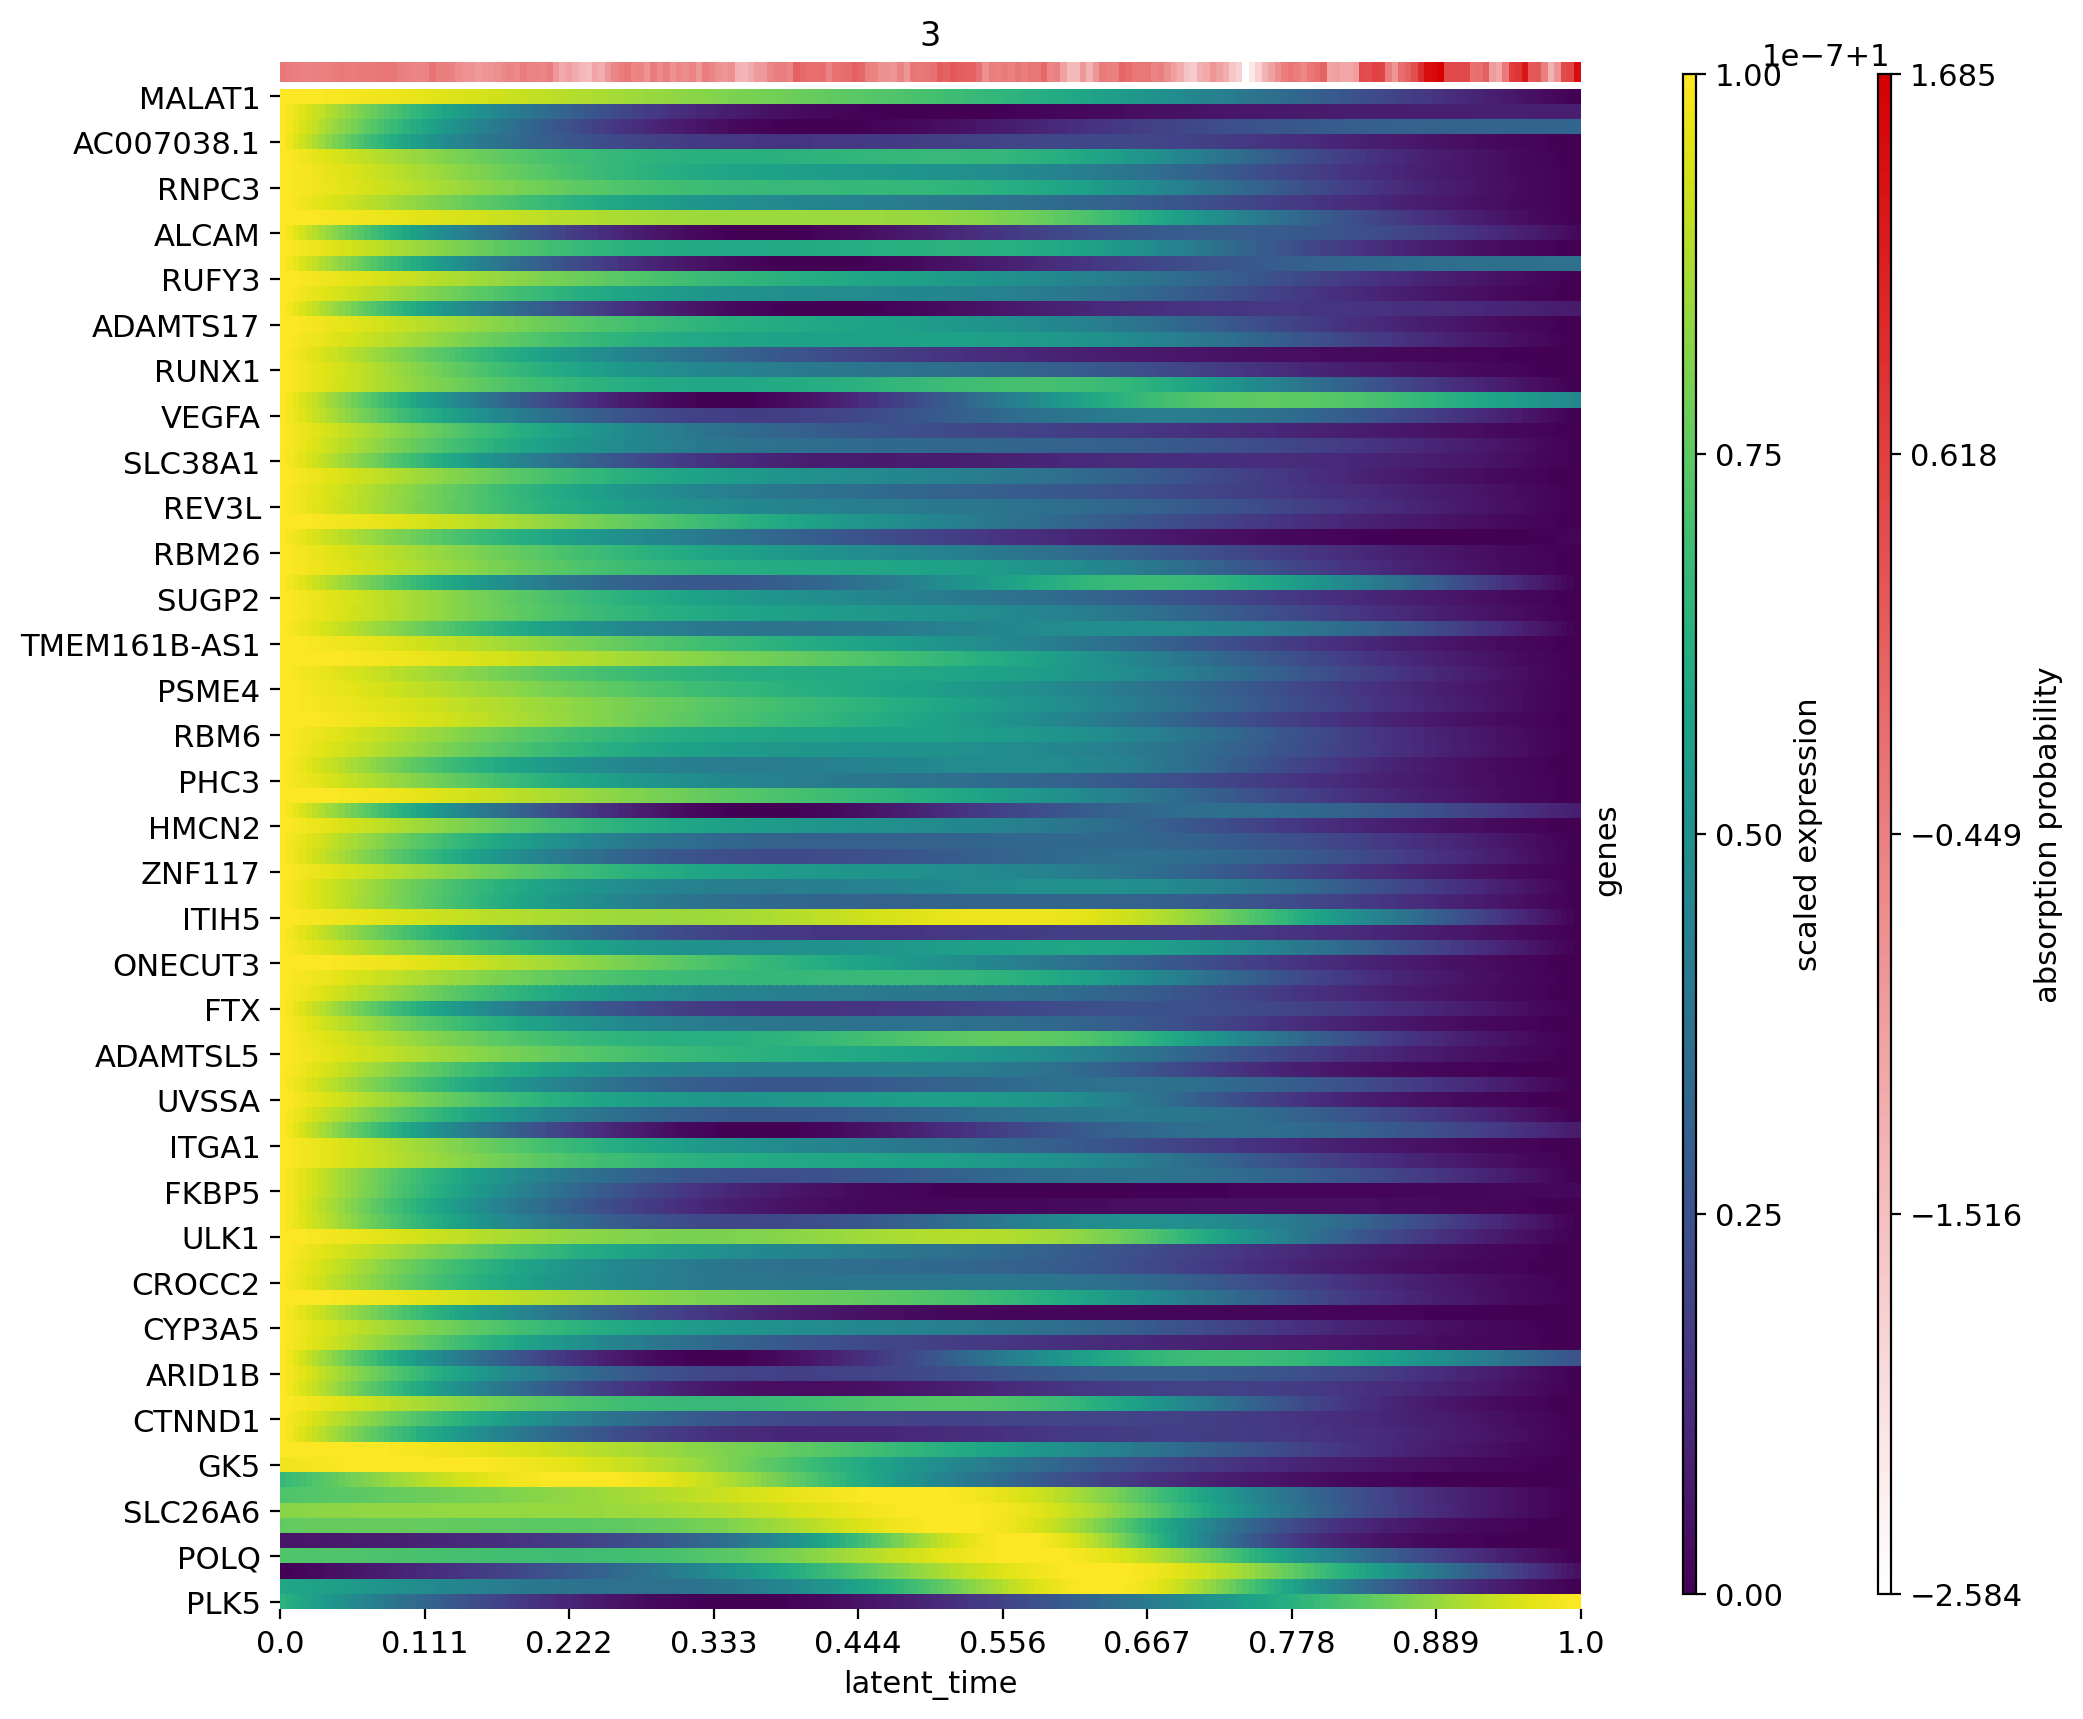

In [45]:
cr.pl.heatmap(adata, model, genes=adata.var['to 3 corr'].sort_values(ascending=False).index[:100],
              show_absorption_probabilities=True,
              lineages="3", n_jobs=1, backend='loky')

In [46]:
cr.pl.circular_projection(adata, keys='clusters', legend_loc='right')

ValueError: Expected at least `3` lineages, found `1`